#### MODULES

In [82]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# show all columns
pd.set_option('display.max_columns', None)



In [83]:
# Keras

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [84]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [2]:
# Torch

import torch
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

#### IMPORT DATA

In [420]:
airbnb = pd.read_csv('./Airbnb/listings_new_2_distr.csv')
airbnb = airbnb.drop(columns=['Unnamed: 0'])

details = pd.read_csv('./Airbnb/details_needed.csv')
details = details.drop(columns=['Unnamed: 0'])

#airbnb_scaled = pd.read_csv('./Airbnb/airbnb_scaled.csv')
#airbnb_scaled = airbnb_scaled.drop(columns=['Unnamed: 0'])


In [421]:
airbnb = details.merge(airbnb, on='id')

In [422]:
airbnb.head(2)

,id,description,description_lenght,host_id,neighbourhood,latitude,longitude,price,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district
0,2818,Quiet Garden View Room & Super Fast WiFi I'm r...,1000.0,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,59,2008-09-24,within an hour,100.0,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100.0,50.0,1,20.0,3,15,today,17,44,44,44,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,strict_14_with_grace_period,f,f,1,2.10,Amsterdam-Oost
1,3209,You will love our spacious (90 m2) bright apar...,1000.0,3806,Westerpark,52.390225,4.873924,160,2008-10-24,within an hour,100.0,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",300.0,40.0,2,15.0,4,20,7 weeks ago,0,0,0,47,42,2015-07-31,2018-08-29,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,f,f,1,1.03,Amsterdam-West


#### Select columns

In [423]:
# Select features

airbnb_model = airbnb[['neighbourhood','price', 'property_type', 
                       'room_type', 'accommodates', 'beds', 'bed_type', 'minimum_nights',
                      'instant_bookable', 'cancellation_policy','security_deposit',
                      'cleaning_fee', 'extra_people', 'bathrooms','bedrooms']]

In [424]:
airbnb_model.var()

price                21266.090344
accommodates             1.739128
beds                     1.931166
minimum_nights         157.186869
security_deposit    115743.397704
cleaning_fee           588.955148
extra_people           490.713887
bathrooms                0.630281
bedrooms                 0.784430
dtype: float64

In [425]:
airbnb_model.isnull().sum()

neighbourhood             0
price                     0
property_type             0
room_type                 0
accommodates              0
beds                      7
bed_type                  0
minimum_nights            0
instant_bookable          0
cancellation_policy       0
security_deposit       6166
cleaning_fee           3629
extra_people              0
bathrooms                10
bedrooms                  8
dtype: int64

In [426]:
airbnb_model.security_deposit.fillna(0, inplace=True)
airbnb_model.cleaning_fee.fillna(0, inplace=True)
#airbnb_model.description_lenght.fillna(0, inplace=True)

In [427]:
airbnb_model.isnull().sum()

neighbourhood           0
price                   0
property_type           0
room_type               0
accommodates            0
beds                    7
bed_type                0
minimum_nights          0
instant_bookable        0
cancellation_policy     0
security_deposit        0
cleaning_fee            0
extra_people            0
bathrooms              10
bedrooms                8
dtype: int64

In [428]:
# Get dummies

airbnb_model_dummies = pd.get_dummies(data = airbnb_model, 
                              columns=['neighbourhood'], drop_first=True) 

In [429]:
col = 'property_type'

conditions = [airbnb_model_dummies[col] == 'Apartment', airbnb_model_dummies[col] == 'Townhouse',
             airbnb_model_dummies[col] == 'Houseboat', airbnb_model_dummies[col] == 'Bed and breakfast',
             airbnb_model_dummies[col] == 'Boat', airbnb_model_dummies[col] == 'Guest suite',
             airbnb_model_dummies[col] == 'Loft', airbnb_model_dummies[col] == 'Serviced apartment',
             airbnb_model_dummies[col] == 'House', airbnb_model_dummies[col] == 'Other',
             airbnb_model_dummies[col] == 'Condominium', airbnb_model_dummies[col] == 'Aparthotel']

choices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

airbnb_model_dummies["property_type_2"] = np.select(conditions, choices, default=np.nan)

In [430]:
col = 'room_type'

conditions = [airbnb_model_dummies[col] == 'Private room', airbnb_model_dummies[col] == 'Entire home/apt',
             airbnb_model_dummies[col] == 'Shared room']

choices = [1, 2, 3]

airbnb_model_dummies["room_type_2"] = np.select(conditions, choices, default=np.nan)

In [431]:
col = 'bed_type'

conditions = [airbnb_model_dummies[col] == 'Real Bed', airbnb_model_dummies[col] == 'Futon',
             airbnb_model_dummies[col] == 'Pull-out Sofa', airbnb_model_dummies[col] == 'Airbed',
             airbnb_model_dummies[col] == 'Couch']

choices = [1, 2, 3, 4, 5]

airbnb_model_dummies["bed_type_2"] = np.select(conditions, choices, default=np.nan)

In [432]:
col = 'instant_bookable'

conditions = [airbnb_model_dummies[col] == 't', airbnb_model_dummies[col] == 'f']

choices = [1, 2]

airbnb_model_dummies["instant_bookable_2"] = np.select(conditions, choices, default=np.nan)

In [433]:
col = 'cancellation_policy'

conditions = [airbnb_model_dummies[col] == 'strict_14_with_grace_period', airbnb_model_dummies[col] == 'moderate',
             airbnb_model_dummies[col] == 'flexible', airbnb_model_dummies[col] == 'super_strict_60']

choices = [1, 2, 3, 4]

airbnb_model_dummies["cancellation_policy_2"] = np.select(conditions, choices, default=np.nan)

In [434]:
# drop: ['property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy']

airbnb_model_dummies = airbnb_model_dummies.drop(columns=['property_type', 'room_type', 'bed_type',
                                                          'instant_bookable', 'cancellation_policy'])

In [435]:
# Remove missing values
airbnb_model_dummies = airbnb_model_dummies.dropna()

In [438]:
airbnb_model_dummies.head()

,price,accommodates,beds,minimum_nights,security_deposit,cleaning_fee,extra_people,bathrooms,bedrooms,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,property_type_2,room_type_2,bed_type_2,instant_bookable_2,cancellation_policy_2
0,59,2,2.0,3,100.0,50.0,20.0,1.5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0
1,160,5,2.0,4,300.0,40.0,15.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,2.0,1.0,2.0,2.0
2,80,2,1.0,1,0.0,0.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,2.0,1.0
3,125,3,1.0,14,300.0,40.0,10.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,1.0,2.0,1.0
4,150,2,1.0,2,0.0,0.0,0.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,1.0,1.0


#### REMOVE OUTLIERS

Identifying the outliers

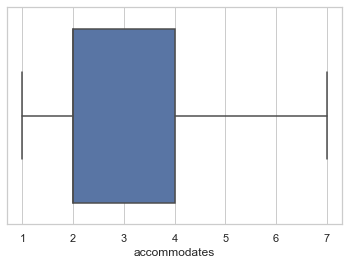

In [803]:
df = airbnb_model_dummies[airbnb_model_dummies['accommodates'] <= 7]
#df['accommodates'].sort_values(ascending=False)
sns.boxplot(x=df['accommodates'])

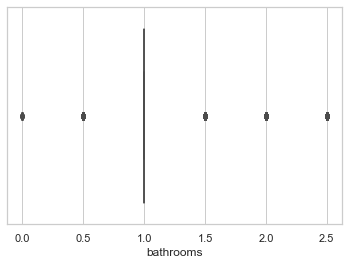

In [808]:
df = airbnb_model_dummies[airbnb_model_dummies['bathrooms'] < 3]
sns.boxplot(x=df['bathrooms'])

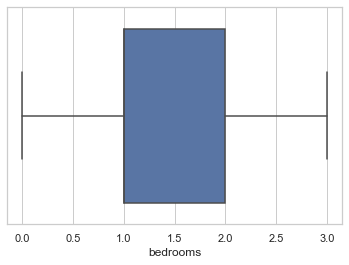

In [810]:
df = airbnb_model_dummies[airbnb_model_dummies['bedrooms'] < 4]
sns.boxplot(x=df['bedrooms'])

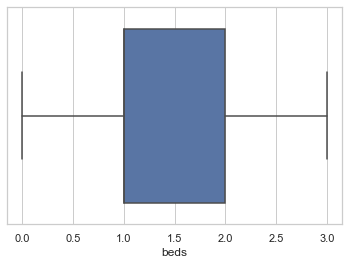

In [812]:
df = airbnb_model_dummies[airbnb_model_dummies['beds'] < 4]
sns.boxplot(x=df['beds'])

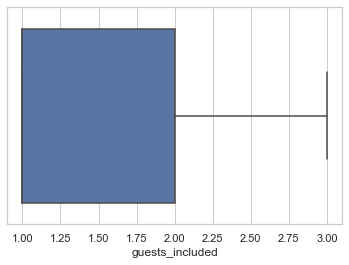

In [814]:
df = airbnb_model_dummies[airbnb_model_dummies['guests_included'] < 4]
sns.boxplot(x=df['guests_included'])

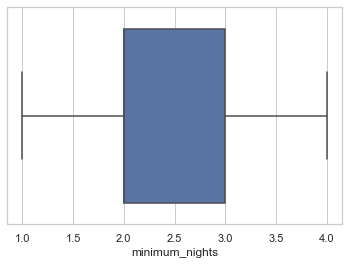

In [817]:
df = airbnb_model_dummies[airbnb_model_dummies['minimum_nights'] < 5]
sns.boxplot(x=df['minimum_nights'])

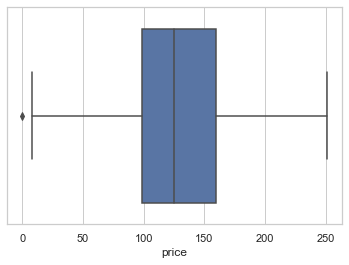

In [832]:
df = airbnb_model_dummies[airbnb_model_dummies['price'] <= 251]
sns.boxplot(x=df['price'])

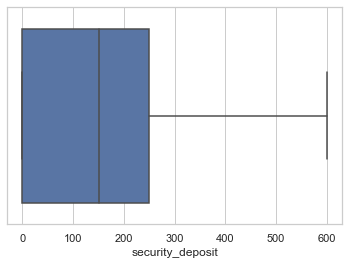

In [843]:
df = airbnb_model_dummies[airbnb_model_dummies['security_deposit'] <= 649]
sns.boxplot(x=df['security_deposit'])

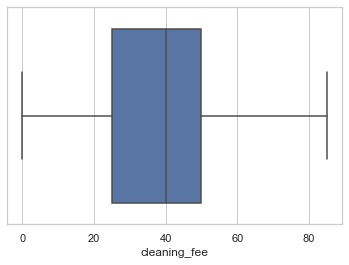

In [845]:
df = airbnb_model_dummies[airbnb_model_dummies['cleaning_fee'] < 89]
sns.boxplot(x=df['cleaning_fee'])

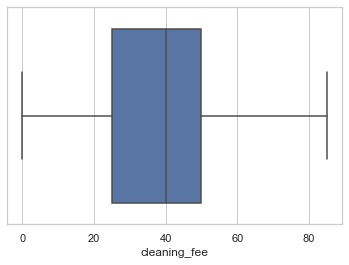

In [791]:
df = airbnb_model_dummies[airbnb_model_dummies['cleaning_fee'] < 89]
sns.boxplot(x=df['cleaning_fee'])

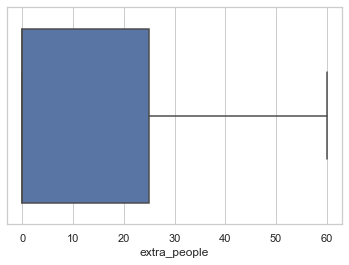

In [847]:
df = airbnb_model_dummies[airbnb_model_dummies['extra_people'] < 65]
sns.boxplot(x=df['extra_people'])

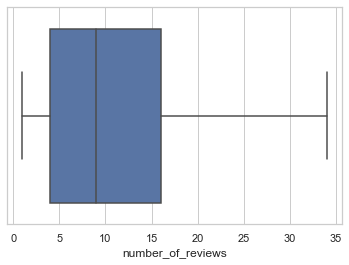

In [869]:
df = airbnb_model_dummies[airbnb_model_dummies['number_of_reviews'] < 35]
sns.boxplot(x=df['number_of_reviews'])

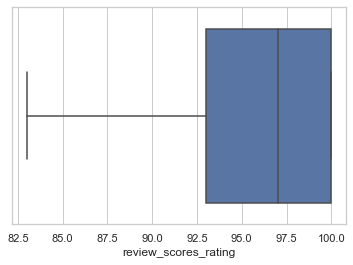

In [875]:
df = airbnb_model_dummies[airbnb_model_dummies['review_scores_rating'] > 82]
sns.boxplot(x=df['review_scores_rating'])

In [439]:
# Remove outliers

airbnb_no_outl = airbnb_model_dummies[airbnb_model_dummies['accommodates'] <= 7]
airbnb_no_outl_2 = airbnb_no_outl[airbnb_no_outl['bathrooms'] < 3]
airbnb_no_outl_3 = airbnb_no_outl_2[airbnb_no_outl_2['bedrooms'] < 4]
airbnb_no_outl_4 = airbnb_no_outl_3[airbnb_no_outl_3['beds'] < 4]
#airbnb_no_outl_5 = airbnb_no_outl_4[airbnb_no_outl_4['guests_included'] < 4]
airbnb_no_outl_7 = airbnb_no_outl_4[airbnb_no_outl_4['minimum_nights'] < 5]
airbnb_no_outl_8 = airbnb_no_outl_7[airbnb_no_outl_7['price'] > 0]
airbnb_no_outl_9 = airbnb_no_outl_8[airbnb_no_outl_8['price'] <= 251]
airbnb_no_outl_10 = airbnb_no_outl_9[airbnb_no_outl_9['security_deposit'] <= 649]
airbnb_no_outl_11 = airbnb_no_outl_10[airbnb_no_outl_10['cleaning_fee'] < 89]
airbnb_no_outl_6 = airbnb_no_outl_11[airbnb_no_outl_11['extra_people'] < 65]
#airbnb_no_outl_13 = airbnb_no_outl_12[airbnb_no_outl_12['number_of_reviews'] < 35]
#airbnb_no_outl_6 = airbnb_no_outl_11[airbnb_no_outl_11['review_scores_rating'] > 82]


"""
'security_deposit', 'cleaning_fee', 'extra_people', 'number_of_reviews', 'review_scores_rating'
"""




"\n'security_deposit', 'cleaning_fee', 'extra_people', 'number_of_reviews', 'review_scores_rating'\n"

In [440]:
airbnb_no_outl_6.shape

(14495, 35)

#### NORMALIZE

In [384]:
airbnb_model_dummies.head()

,price,accommodates,beds,minimum_nights,security_deposit,cleaning_fee,extra_people,bathrooms,bedrooms,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,property_type_2,room_type_2,bed_type_2,instant_bookable_2,cancellation_policy_2
0,59,2,2.0,3,100.0,50.0,20.0,1.5,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0
1,160,5,2.0,4,300.0,40.0,15.0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,2.0,1.0,2.0,2.0
2,80,2,1.0,1,0.0,0.0,0.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,2.0,1.0
3,125,3,1.0,14,300.0,40.0,10.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,1.0,2.0,1.0
4,150,2,1.0,2,0.0,0.0,0.0,1.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,1.0,1.0


In [441]:
# Normalize the following columns: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights'] 
#'description_lenght',
min_max_scaler = MinMaxScaler()
airbnb_scale = min_max_scaler.fit_transform(airbnb_no_outl_6[['accommodates', 'beds',
                                                              'minimum_nights', 'security_deposit', 'cleaning_fee', 'extra_people',
                                                              'bathrooms','bedrooms']])

airbnb_scale_df = pd.DataFrame(airbnb_scale, index=airbnb_no_outl_6.index, columns=['accommodates', 
                                                                                    'beds', 'minimum_nights',
                                                                                   'security_deposit', 'cleaning_fee', 'extra_people', 
                                                                                    'bathrooms','bedrooms'])
airbnb_scale_df.head()

,accommodates,beds,minimum_nights,security_deposit,cleaning_fee,extra_people,bathrooms,bedrooms
0,0.166667,0.666667,0.666667,0.166667,0.588235,0.333333,0.6,0.333333
1,0.666667,0.666667,1.000000,0.500000,0.470588,0.250000,0.4,0.666667
2,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.4,0.333333
4,0.166667,0.333333,0.333333,0.000000,0.000000,0.000000,0.4,0.333333
5,0.166667,0.666667,0.666667,0.250000,0.176471,0.000000,0.4,0.333333


In [442]:
airbnb_no_outl_7 = airbnb_no_outl_6.drop(columns=['accommodates', 
                                                'beds', 'minimum_nights',
                                                 'security_deposit', 'cleaning_fee', 'extra_people',
                                                  'bathrooms','bedrooms'])
airbnb_no_outl_7 = airbnb_no_outl_7.reset_index()

In [443]:
airbnb_scale_df = airbnb_scale_df.reset_index()
airbnb_scale_df.head()

,index,accommodates,beds,minimum_nights,security_deposit,cleaning_fee,extra_people,bathrooms,bedrooms
0,0,0.166667,0.666667,0.666667,0.166667,0.588235,0.333333,0.6,0.333333
1,1,0.666667,0.666667,1.000000,0.500000,0.470588,0.250000,0.4,0.666667
2,2,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.4,0.333333
3,4,0.166667,0.333333,0.333333,0.000000,0.000000,0.000000,0.4,0.333333
4,5,0.166667,0.666667,0.666667,0.250000,0.176471,0.000000,0.4,0.333333


In [444]:
# merge
airbnb_scaled = pd.merge(airbnb_scale_df, airbnb_no_outl_7, on='index')

In [445]:
airbnb_scaled = airbnb_scaled.drop(columns='index')

In [446]:
# Move 'price' column to front
airbnb_scaled = airbnb_scaled.set_index('price').reset_index()

In [447]:
airbnb_scaled.head()

,price,accommodates,beds,minimum_nights,security_deposit,cleaning_fee,extra_people,bathrooms,bedrooms,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,property_type_2,room_type_2,bed_type_2,instant_bookable_2,cancellation_policy_2
0,59,0.166667,0.666667,0.666667,0.166667,0.588235,0.333333,0.6,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0
1,160,0.666667,0.666667,1.000000,0.500000,0.470588,0.250000,0.4,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,2.0,1.0,2.0,2.0
2,80,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.4,0.333333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,2.0,1.0
3,150,0.166667,0.333333,0.333333,0.000000,0.000000,0.000000,0.4,0.333333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,1.0,1.0
4,65,0.166667,0.666667,0.666667,0.250000,0.176471,0.000000,0.4,0.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0,2.0


In [305]:
#airbnb_scaled.to_csv('airbnb_scaled.csv')

#### REVIEW DATA

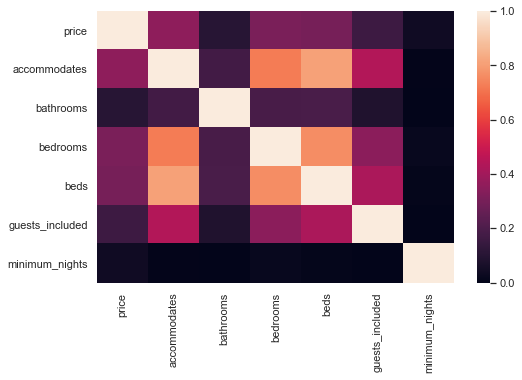

In [189]:
# Heatmap
f, axes = plt.subplots(1, figsize=(8,5))
sns.heatmap(airbnb_model.corr())

##### BOSTON HOUSING EXAMPLE

In [200]:
Y = airbnb_model_dummies['price'] 
X = airbnb_model_dummies[airbnb_model_dummies.columns.difference(['price'])]
print(X.shape)
print(Y.shape)

(20006, 68)
(20006,)


In [201]:
seed      = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)


In [202]:
folds   = 10
metric  = "neg_mean_squared_error"

In [203]:
# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

In [204]:
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -19587.081, 19221.954
Lasso: -19683.598, 19258.086
ElasticNet: -19623.482, 19604.25
KNN: -22269.135, 20111.27
DecisionTree: -31778.148, 25610.146


C:\Users\anete\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\anete\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KeyboardInterrupt: 

In [107]:
# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.savefig("model_mse_scores.png")
plt.clf()
plt.close()

### REGRESSION MODELS

Random Forest Regressor

In [700]:
airbnb_scaled.head()

,price,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,property_type_2,room_type_2,bed_type_2,instant_bookable_2,cancellation_policy_2
0,59,0.166667,0.500000,0.25,0.50,0.000000,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0
1,160,0.666667,0.333333,0.50,0.50,0.333333,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,2.0,1.0,2.0,2.0
2,80,0.166667,0.333333,0.25,0.25,0.333333,0.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,2.0,1.0
3,150,0.166667,0.333333,0.25,0.25,0.000000,0.25,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,1.0,1.0
4,65,0.166667,0.333333,0.25,0.50,0.333333,0.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0,2.0


In [967]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

In [968]:
y = airbnb_scaled['price'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['price'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [975]:
#### Random Forrest Regressor

rfr_2 = RandomForestRegressor(max_depth=11).fit(X_train, y_train)
y_pred_train_2 = rfr_2.predict(X_train)
y_pred_test_2 = rfr_2.predict(X_test)
score_train_2 = performance_metric(y_train, y_pred_train_2)

score_test_2 = performance_metric(y_test, y_pred_test_2)

print('\nTrain set',score_train_2, 'Test set', score_test_2)


Train set 0.6322761462546205 Test set 0.3302048119051183


C:\Users\anete\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Linear Regression

In [976]:
from sklearn.linear_model import LinearRegression

y = airbnb_scaled['price'] 
X = airbnb_scaled[airbnb_scaled.columns.difference(['price'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = LinearRegression().fit(X_train, y_train)

In [977]:
y_pred = regressor.predict(X_test)

test_set_r2 = r2_score(y_test, y_pred)
print('R-squared:',test_set_r2)

R-squared: 0.35908309530014015


#### Categorical

In [978]:
col = 'price'

conditions = [(airbnb_scaled[col] > 0) & (airbnb_scaled[col] <= 50),
             (airbnb_scaled[col] > 50) & (airbnb_scaled[col] <= 100), 
             (airbnb_scaled[col] > 100) & (airbnb_scaled[col] <= 150),
             (airbnb_scaled[col] > 150) & (airbnb_scaled[col] <= 200),
             (airbnb_scaled[col] > 200) & (airbnb_scaled[col] <= 250)]


choices = [1, 2, 3, 4, 5]

airbnb_scaled["price_cat"] = np.select(conditions, choices, default=np.nan)

In [979]:
from sklearn import svm

y = airbnb_scaled['price_cat']
X = airbnb_scaled[airbnb_scaled.columns.difference(['price_cat', 'price'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [980]:
clf = svm.SVC(gamma='auto',probability=True).fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [981]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.48302469135802467

Confusion matrix:
 [[  0  13   4   0   0]
 [  0 118 283   0   0]
 [  0  37 508   0   0]
 [  0  14 245   0   0]
 [  0   3  71   0   0]]


### Neural Networks

#### KERAS

In [448]:
airbnb_scaled.shape

(14495, 35)

In [457]:
# Convert data to numpy arrays
dataset = airbnb_scaled.values

In [458]:
Y = dataset[:,0]
X = dataset[:,1:]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2)

# split 'X_val_and_test' and 'Y_val_and_test'
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(11596, 34) (1449, 34) (1450, 34) (11596,) (1449,) (1450,)


In [459]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(34,)),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='linear'),
])

In [460]:
# telling which algorithm use for optimization, what function to use for loss optimization

model.compile(optimizer='adam',
              loss='mean_squared_logarithmic_error',
              metrics=['mse', 'mean_absolute_error'])

In [461]:
# Training the data

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val))

Train on 11596 samples, validate on 1449 samples
Epoch 1/20
11596/11596 [==============================] - 1s 108us/step - loss: 1.0664 - mse: 4042.7676 - mean_absolute_error: 47.1232 - val_loss: 0.1042 - val_mse: 1572.2412 - val_mean_absolute_error: 30.5946
Epoch 2/20
11596/11596 [==============================] - 1s 65us/step - loss: 0.0984 - mse: 1537.9567 - mean_absolute_error: 29.9233 - val_loss: 0.0868 - val_mse: 1375.5116 - val_mean_absolute_error: 28.0432
Epoch 3/20
11596/11596 [==============================] - 1s 68us/step - loss: 0.0890 - mse: 1405.4525 - mean_absolute_error: 28.4349 - val_loss: 0.0873 - val_mse: 1325.8838 - val_mean_absolute_error: 27.8486
Epoch 4/20
11596/11596 [==============================] - 1s 66us/step - loss: 0.0878 - mse: 1382.6805 - mean_absolute_error: 28.2481 - val_loss: 0.0848 - val_mse: 1354.9733 - val_mean_absolute_error: 27.5804
Epoch 5/20
11596/11596 [==============================] - 1s 66us/step - loss: 0.0869 - mse: 1371.2385 - mean_abso

In [462]:
_, train_mse, train_mean_absolute_error = model.evaluate(X_train, Y_train)
_, test_mse, test_mean_absolute_error = model.evaluate(X_test, Y_test)

#_, train_mean_absolute_error = model.evaluate(X_train, Y_train)
#_, test_mean_absolute_error = model.evaluate(X_test, Y_test)

print('\ntrain_mse:', train_mse, 'train_mean_absolute_error:', train_mean_absolute_error, '\ntest_mse:', test_mse, 
     'test_mean_absolute_error:', test_mean_absolute_error)



1450/1450 [==============================] - 0s 25us/step

train_mse: 1338.790283203125 train_mean_absolute_error: 27.431716918945312 
test_mse: 1441.85693359375 test_mean_absolute_error: 28.0744686126709


In [463]:
x = model.predict(X_test)
print(x[200])

percentage = test_mean_absolute_error/123.69633733456448 * 100
percentage

[111.94359]


22.69628124617563

In [464]:
Y_test[200]

175.0

##### Confidence interval

In [ ]:
h0 = 30
# h1 is not 30
hourly = salaries.loc[(salaries['Salary or Hourly'] == 'Hourly')]
rate = hourly['Hourly Rate']
mean = hourly['Hourly Rate'].mean()
stdev = np.std(hourly['Hourly Rate'])
size = hourly['Hourly Rate'].count()


t_value = (mean - h0) / (stdev / np.sqrt(size))

print(ttest_1samp(rate, h0).pvalue)

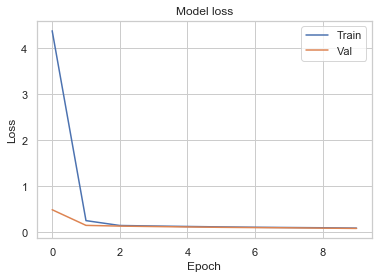

In [485]:
# visualize the training loss and the validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

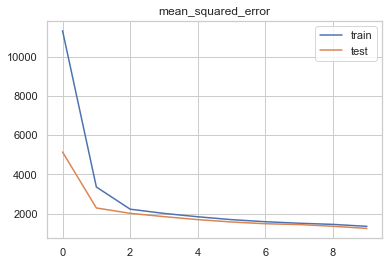

In [486]:
# plot mean_squared_error

plt.title('mean_squared_error')
plt.plot(hist.history['mse'], label='train')
plt.plot(hist.history['val_mse'], label='test')
plt.legend()
plt.show()

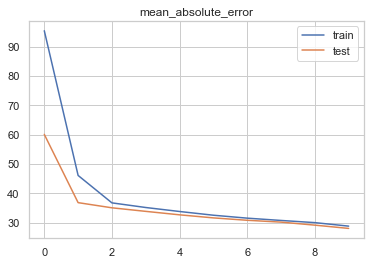

In [487]:
# plot mean_absolute_error

plt.title('mean_absolute_error')
plt.plot(hist.history['mean_absolute_error'], label='train')
plt.plot(hist.history['val_mean_absolute_error'], label='test')
plt.legend()
plt.show()

#### Categorical predictions with Keras

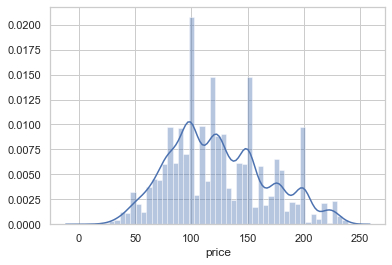

In [488]:
sns.distplot(airbnb_scaled['price'])

In [490]:
airbnb_scaled['price'].min()

8

In [465]:
# Split price into categories

col = 'price'

conditions = [(airbnb_scaled[col] > 0) & (airbnb_scaled[col] <= 50),
             (airbnb_scaled[col] > 50) & (airbnb_scaled[col] <= 100), 
             (airbnb_scaled[col] > 100) & (airbnb_scaled[col] <= 150),
             (airbnb_scaled[col] > 150) & (airbnb_scaled[col] <= 200),
             (airbnb_scaled[col] > 200) & (airbnb_scaled[col] <= 250)]


choices = [1, 2, 3, 4, 5]

airbnb_scaled["price_cat"] = np.select(conditions, choices, default=np.nan)

In [466]:
airbnb_scaled.head()

,price,accommodates,beds,minimum_nights,security_deposit,cleaning_fee,extra_people,bathrooms,bedrooms,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Gaasperdam - Driemond,neighbourhood_Geuzenveld - Slotermeer,neighbourhood_IJburg - Zeeburgereiland,neighbourhood_Noord-Oost,neighbourhood_Noord-West,neighbourhood_Oostelijk Havengebied - Indische Buurt,neighbourhood_Osdorp,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,property_type_2,room_type_2,bed_type_2,instant_bookable_2,cancellation_policy_2,price_cat
0,59,0.166667,0.666667,0.666667,0.166667,0.588235,0.333333,0.6,0.333333,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,2.0
1,160,0.666667,0.666667,1.000000,0.500000,0.470588,0.250000,0.4,0.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,2.0,1.0,2.0,2.0,4.0
2,80,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.4,0.333333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,1.0,2.0,1.0,2.0
3,150,0.166667,0.333333,0.333333,0.000000,0.000000,0.000000,0.4,0.333333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,1.0,1.0,1.0,1.0,3.0
4,65,0.166667,0.666667,0.666667,0.250000,0.176471,0.000000,0.4,0.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,2.0,2.0,2.0


In [467]:
airbnb_scaled_cat = airbnb_scaled.set_index('price_cat').reset_index()

In [468]:
airbnb_scaled_cat.shape

(14495, 36)

In [469]:
# Convert data to numpy arrays
dataset = airbnb_scaled_cat.values

In [ ]:
""" 
Y = dataset[:,0] 
X = dataset[:,2:]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = np_utils.to_categorical(encoded_Y)

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=31, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

"""

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3)

# split 'X_val_and_test' and 'Y_val_and_test'
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [521]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(32,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [522]:
# telling which algorithm use for optimization, what function to use for loss optimization,
# and accuracy metrics

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the data

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

In [55]:
model.evaluate(X_test, Y_test)

2437/2437 [==============================] - 0s 17us/step


[0.573379233082054, 0.6947066187858582]

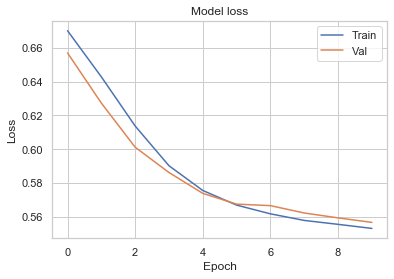

In [56]:
# visualize the training loss and the validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

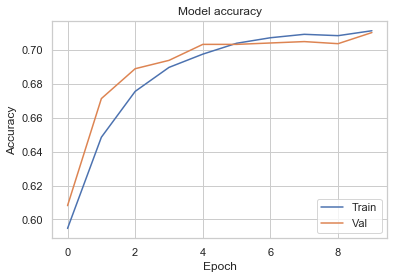

In [57]:
# visualize the training accuracy and validation accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#### TORCH

In [99]:
train = airbnb_model_dummies[:10000]
test = airbnb_model_dummies[10000:]
test = test.drop('price', axis=1)

In [117]:
X_train, X_val, y_train, y_val = train_test_split(train.drop('price', axis=1), 
                                                  train['price'], test_size=0.2, random_state=42)

In [118]:
X_train.to_numpy()
X_val.to_numpy()
y_train.to_numpy()
y_val.to_numpy()

array([ 89,  85,  75, ..., 149, 110, 105], dtype=int64)

In [125]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(160, 68)
        self.fc2 = nn.Linear(68, 50)
        self.fc3 = nn.Linear(50, 18)
        self.fc4 = nn.Linear(18, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        return x

In [126]:
train_batch = np.array_split(X_train, 50)
label_batch = np.array_split(y_train, 50)

In [130]:
train_batch.to_numpy()

list

In [ ]:
for i in range(len(train_batch)):
    train_batch[i] = torch.from_numpy(train_batch[i].values).float()
    #print(train_batch[i])

for i in range(len(label_batch)):
    label_batch[i] = torch.from_numpy(label_batch[i].values).float().view(-1, 1)

X_val = torch.from_numpy(X_val.values).float()
y_val = torch.from_numpy(y_val.values).float().view(-1, 1)

In [128]:
type(train_batch[0])

torch.Tensor

In [ ]:
model = Regressor()
new = train_batch[0]
ps = model(new)
ps.shape

In [ ]:
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 300

train_losses, test_losses = [], []
for e in range(epochs):
    model.train()
    train_loss = 0
    for i in range(len(train_batch)):
        optimizer.zero_grad()
        output = model(train_batch[i])
        loss = torch.sqrt(criterion(torch.log(output), torch.log(label_batch[i])))
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    else:
            test_loss = 0
            accuracy = 0

            with torch.no_grad():
                model.eval()
                predictions = model(X_val)
                test_loss += torch.sqrt(criterion(torch.log(predictions), torch.log(y_val)))

            train_losses.append(train_loss/len(train_batch))
            test_losses.append(test_loss)

            print("Epoch: {}/{}.. ".format(e+1, epochs),
                  "Training Loss: {:.3f}.. ".format(train_loss/len(train_batch)),
                  "Test Loss: {:.3f}.. ".format(test_loss))
